<a href="https://colab.research.google.com/github/ucfilho/Dam_Project_Methods/blob/master/Metodo_01_xgboost_campo_BL3_nov_05_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# carrega bibliotecas principais
import numpy as np
import pandas as pd
from pandas import read_excel

from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [0]:
# https://github.com/Thamayne/Dam-Project/

In [3]:
# clicar no botao e selecionar o arquivo
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Planilha de campo_BL3.xlsx to Planilha de campo_BL3 (3).xlsx


In [0]:
my_sheet = 'Planilha_Campo_Ok'
file_name = 'Planilha de campo_BL3.xlsx' # name of your excel file
df = read_excel(file_name, sheet_name = my_sheet,header=1)

In [0]:

Nomes=['Est','Par','CAP(cm)','DAP','H(m)','Nome comum'] # neste caso nao tem cm em DAP e Parc esta como Par
XY=df[Nomes]
XY=XY.dropna()


In [0]:
numbers = np.unique(XY['Nome comum'], return_inverse=True)
#print(numbers)

In [0]:
XY['Tree']=pd.Series(numbers[1])
#print(XY)

In [0]:
#Nomes_X=['Tree','Par','CAP(cm)','DAP','H(m)']
Nomes_X=['Tree','CAP(cm)','DAP','H(m)'] # ???? o que representa Par ???
Nomes_Y=['Est']
X=XY[Nomes_X]
Y=XY[Nomes_Y]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


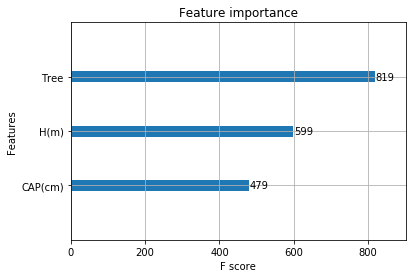

In [9]:
# fit model no training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [10]:
print(X.head())

   Tree  CAP(cm)        DAP  H(m)
0   105     62.0  19.735213   9.0
1    81     17.0   5.411268   5.0
2   105     64.0  20.371833  10.0
3   105     87.0  27.692960  11.0
4   103     33.0  10.504226  10.0


In [11]:
Xt, Xv, yt, yv = train_test_split(X, Y, test_size = 0.25, random_state = 0)
dt = xgb.DMatrix(Xt.as_matrix(),label=yt.as_matrix())
dv = xgb.DMatrix(Xv.as_matrix(),label=yv.as_matrix())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#Build the model
params = {
    "eta": 0.2,
    "max_depth": 4,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(yt),
    'n_estimators': 1000,
    "eval_metric": "logloss"
}
model = xgb.train(params, dt, 3000, [(dt, "train"),(dv, "valid")], verbose_eval=200)

XGBoostError: ignored

In [0]:
#Prediction on validation set
y_pred = model.predict(dv)

# Making the Confusion Matrix
cm = confusion_matrix(yv, (y_pred>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))